# Clustering

Sometimes we come across datasets that do not have labels and we would want to still categorise the data points into several groups. For example, grouping set of people based on their movie choices etc. To solve such a scenario, we use **Clustering** algorithms. These algorithms come under the section of **Unsupervised Learnning** as no labels are provided. In this notebook, I will work with two clustering algorithms.
1. K Means Clustering
2. Hierarchical Clustering

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the dataset `Mall_Customers.csv`.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Using the last two columns from the dataset for this notebook.

In [3]:
X = dataset.iloc[:, -2:]

## K Means Clustering

**K Means Clustering** is an algorithms that takes the dataset and splits it into **K** different clusters. The centroids are identified and the nearby points are labelled based on the centroids. The distances for the clustering is based on Eucledian but can be changed if required.

To find out the ideal number of clusters, we use the **Elbow Method**. In this method, we plot **Within Cluster Sum of Squares (WCSS)** against the increasing number of clusters. In such a plot, one notices an elbow type shape. Such a point defines the ideal number of clusters.

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters = i)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)

Text(0.5, 1.0, 'Elbow Method to detect Clusters')

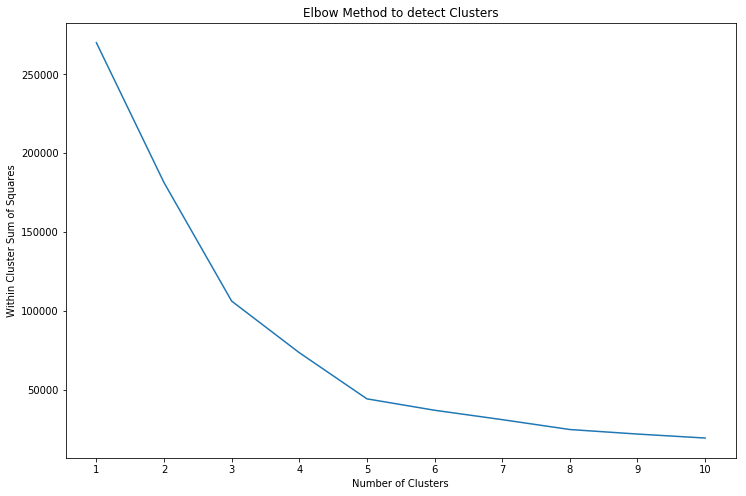

In [5]:
plt.figure(figsize = (12, 8))
plt.plot([i for i in range(1, 11)], wcss)
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Method to detect Clusters')

Taking a look at the elbow curve above, the elbow occurs at 5 clusters. Thus, I decided to take 5 as the numbers of clusters.

In [6]:
kMeans = KMeans(n_clusters = 5)
kmeans_clusters = kMeans.fit_predict(X)

Now that I have made 5 clusters, I'll plot them using scatter plot on the graph with different colors.

Text(0.5, 1.0, 'Customer groups based on Spending Pattern')

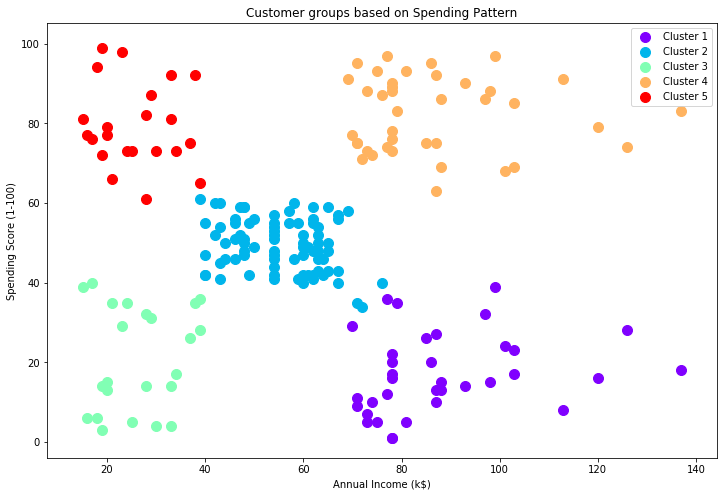

In [7]:
cluster_count = len(np.unique(kmeans_clusters))
colors = cm.rainbow(np.linspace(0, 1, cluster_count))
plt.figure(figsize = (12, 8))
for i in range(cluster_count):
    plt.scatter(X.iloc[kmeans_clusters == i, 0], 
                X.iloc[kmeans_clusters == i, 1], 
                c = [colors[i]], 
                s = 100, 
                label = 'Cluster ' + str(i+1))
plt.legend()
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Customer groups based on Spending Pattern')

## Heirarchical Clustering

**Hierarchical Clustering** involves creating a dendrogram. It is a tree like structure created based on the set of values that we have. We keep joining the closest two points/clusters to form another cluster based on the distance between them till we have just one cluster.

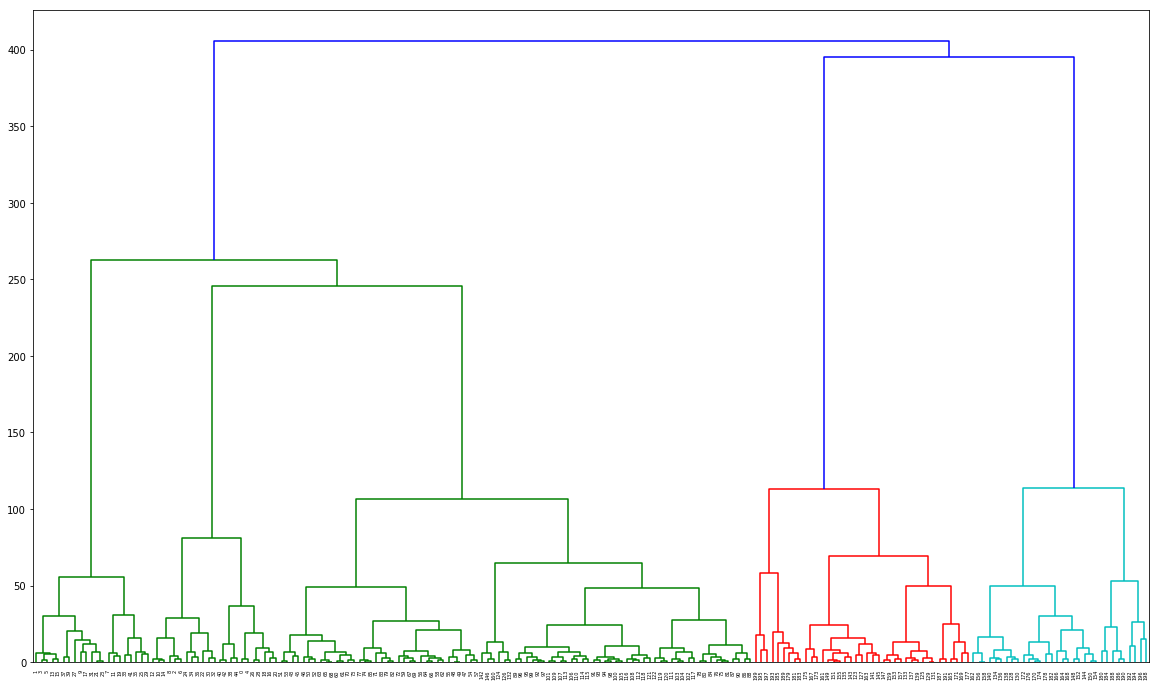

In [8]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (20, 12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

Once we have the dendrogram, we start look for the **longest vertical line**. The line should be such that if we create a horizontal line at any of its points, it should not hit any horizontal line. Once a vertical line is finalized, draw a horizontal line and count the number of vertical lines it hits. This number will be the number of clusters we should form.

Taking a look at the plot above, the longest line would be blue from 110 to 380 but a horizontal line at 260 and 245 would cut the green horizontal lines.
Repeating the same, we see that the longest vertical line is the green line from approximately 110 to 245 and as a result, a horizontal line here would cross 5 vertical lines.

In [9]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5)
hc_clusters = hc.fit_predict(X)

Text(0.5, 1.0, 'Customer groups based on Spending Pattern')

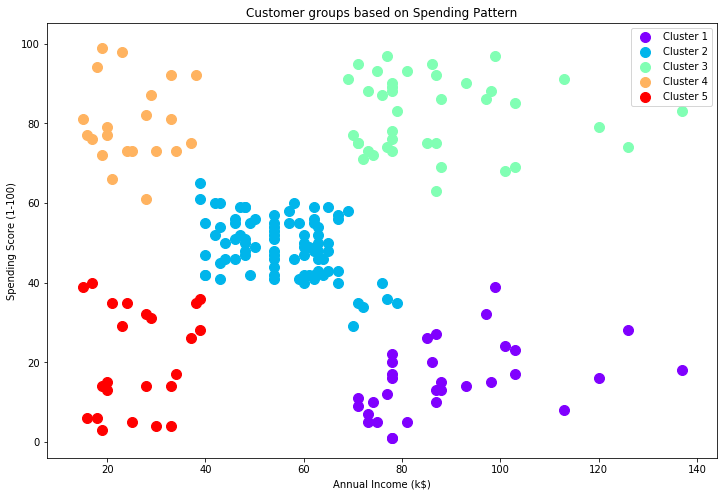

In [10]:
cluster_count = len(np.unique(hc_clusters))
colors = cm.rainbow(np.linspace(0, 1, cluster_count))
plt.figure(figsize = (12, 8))
for i in range(cluster_count):
    plt.scatter(X.iloc[hc_clusters == i, 0], 
                X.iloc[hc_clusters == i, 1], 
                c = [colors[i]], 
                s = 100, 
                label = 'Cluster ' + str(i+1))
plt.legend()
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Customer groups based on Spending Pattern')